# Importing Libraries

In [1]:
!pip install kaggle
import kaggle
!kaggle datasets download shivamb/netflix-shows -f netflix_titles.csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix_titles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('netflix_titles.csv.zip')
zip_ref.extractall()
zip_ref.close()

# Loading the Dataset

In [4]:
netflix=pd.read_csv("netflix_titles.csv")

# First 10 values

In [9]:
# netflix.columns=netflix.columns.str.lower()
# netflix.columns=netflix.columns.str.replace(' ','_')
netflix.columns
# netflix.head(5)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
netflix['date_added']=netflix['date_added'].str.strip()
# netflix['date_added']=pd.to_datetime(netflix['date_added'],format="%B %d, %Y")

In [13]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Shape of the dataset

In [16]:
netflix.shape

(8807, 12)

# Print the name of columns

In [19]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Check for NULL Values

In [22]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Check unique values

In [25]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Check for Duplicate values

In [28]:
netflix.duplicated().sum()

0

# Make a copy of the dataset

In [31]:
df = netflix.copy()

In [33]:
df.shape

(8807, 12)

# Drop NULL values

In [36]:
df = df.dropna()
df.shape

(5332, 12)

# Print first 10 values

In [39]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


# Convert Date Time format

In [42]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [44]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,20,2021,9
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,19,2021,9
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",19,2021,9
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,16,2021,9
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,16,2021,9


# Data Visualization

Type: Movie and TV Shows

In [48]:
# netflix['type'] = netflix['type'].astype('category')
# print(netflix['type'].isnull().sum())

Text(0.5, 1.0, 'Type')

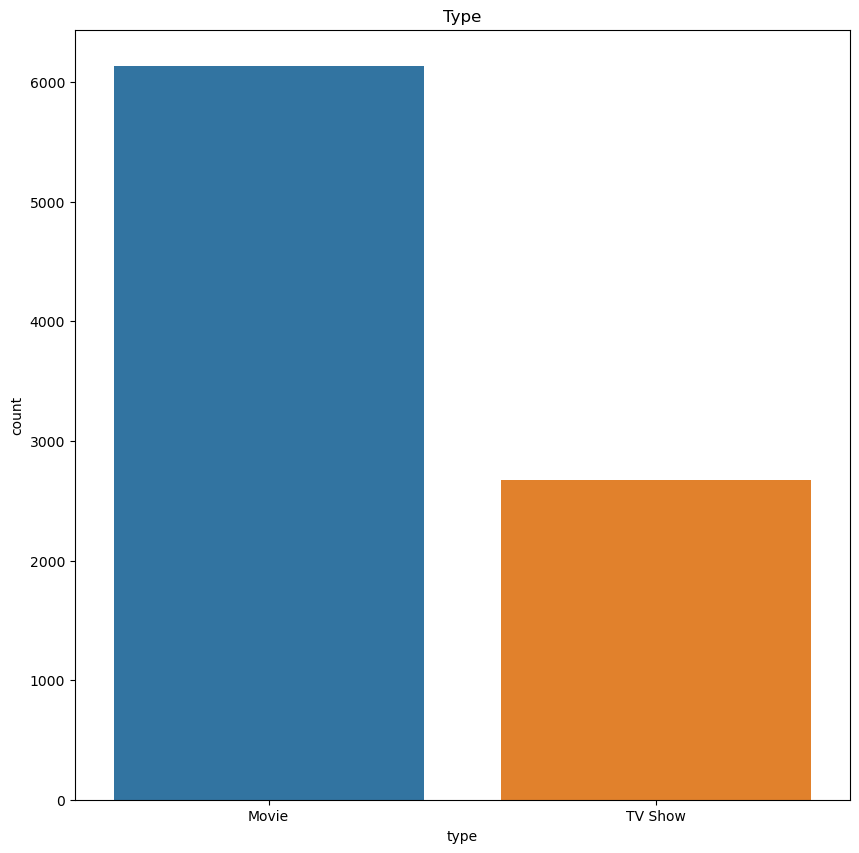

In [50]:
# sns.countplot(netflix['type'])
sns.countplot(data=netflix, x='type')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

# Rating of shows and movies

Text(0.5, 1.0, 'Rating')

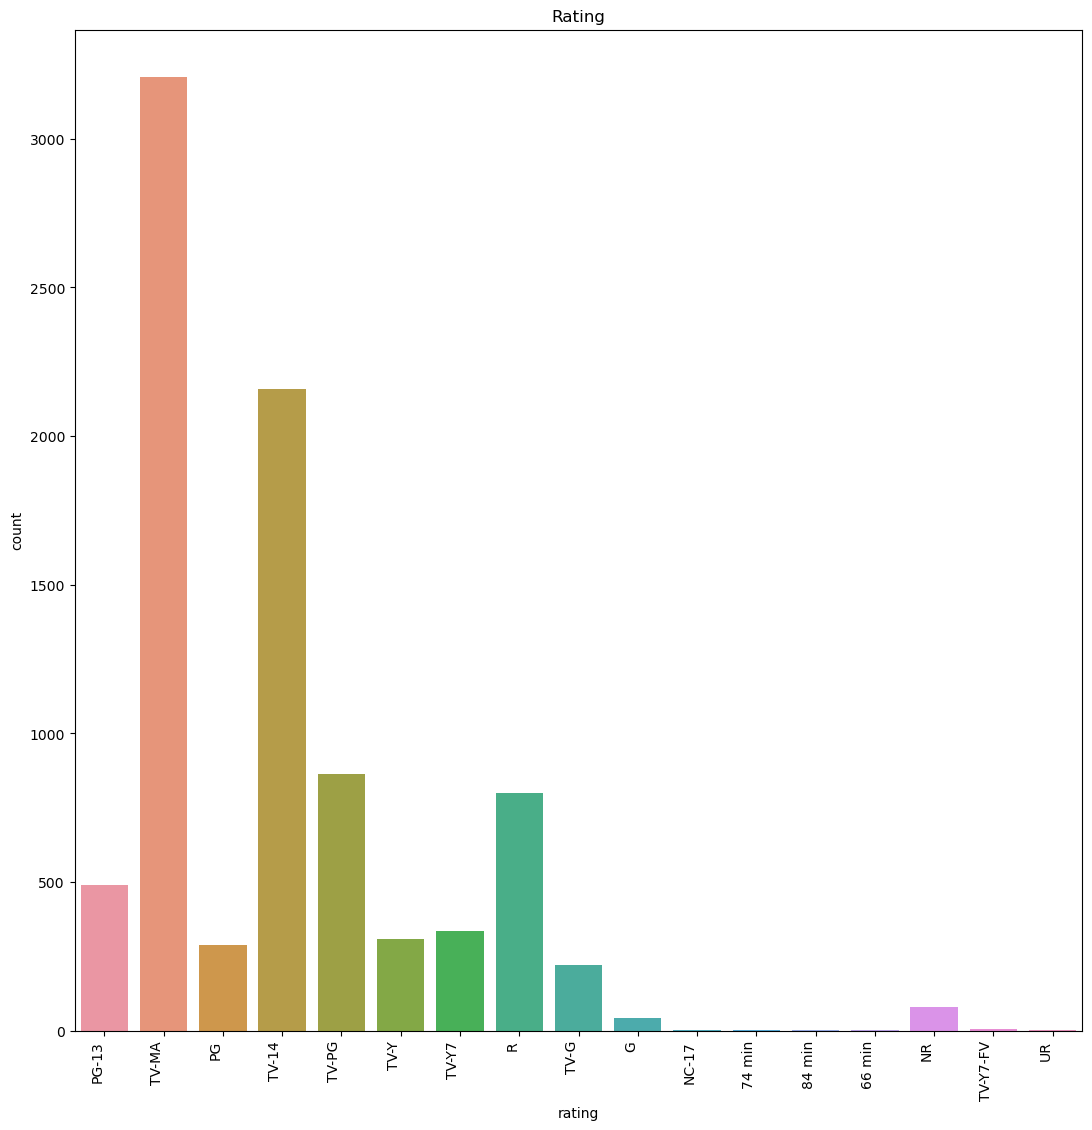

In [53]:
sns.countplot(data=netflix, x='rating')
sns.countplot(data=netflix, x='rating').set_xticklabels(sns.countplot(data=netflix, x='rating').get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

# Relation between Type and Rating

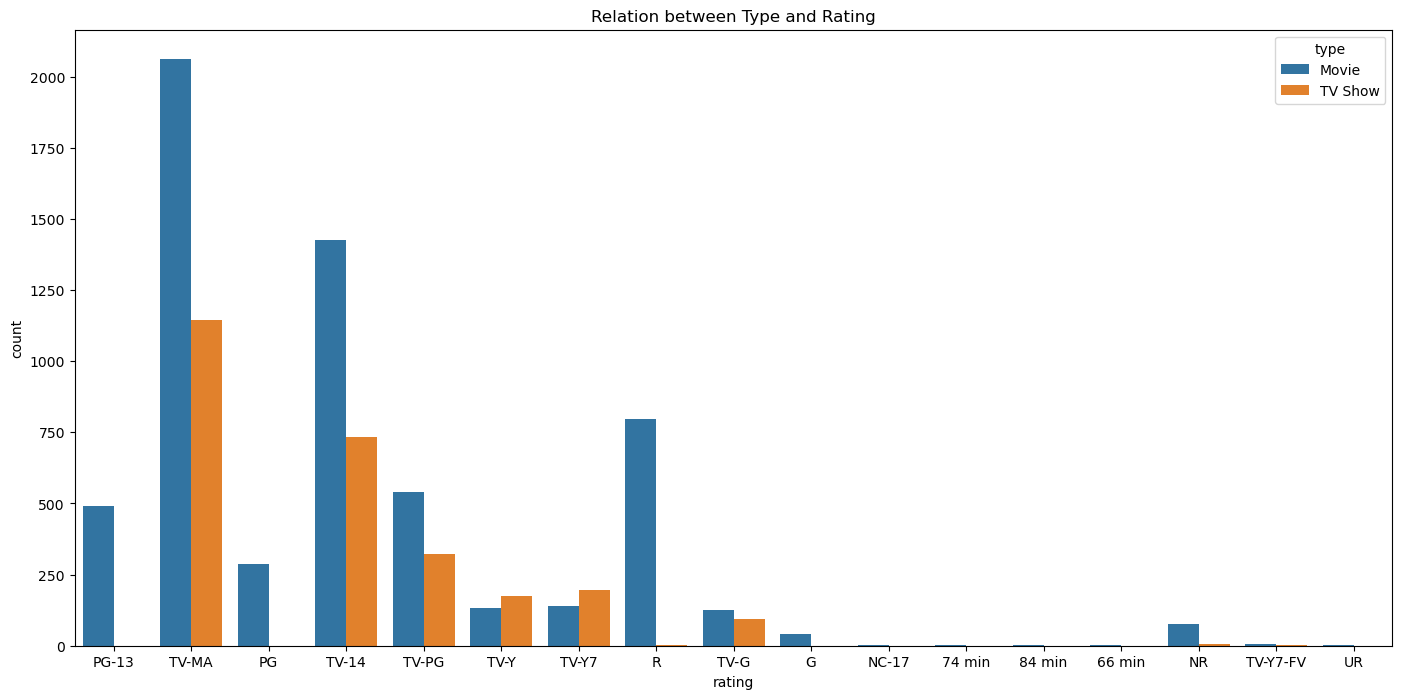

In [88]:
plt.figure(figsize=(17,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

# Pie-chart for the Type: Movie and TV Shows

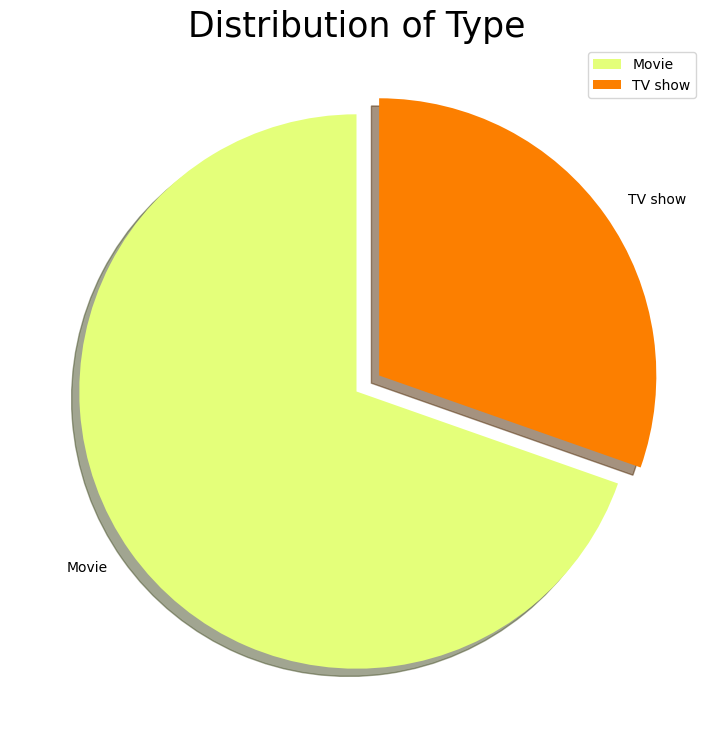

In [59]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

# Pie-chart for Rating

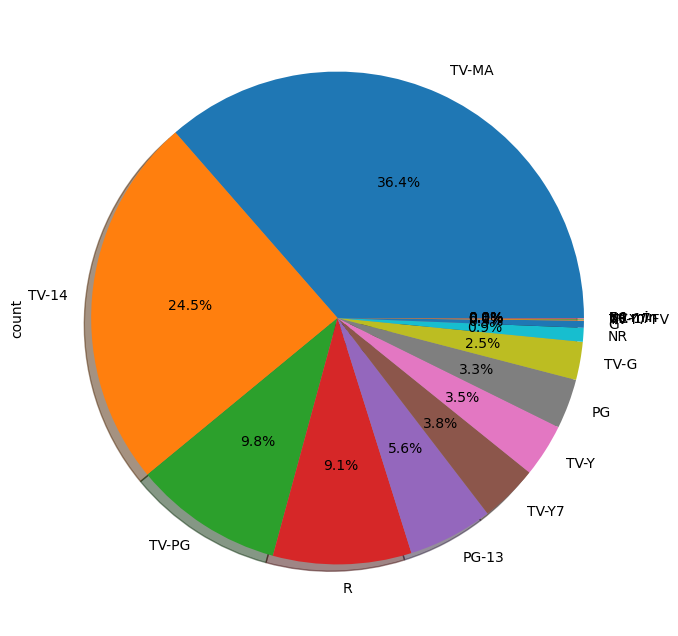

In [62]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# WordCloud

In [65]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [66]:
from wordcloud import WordCloud

# Country

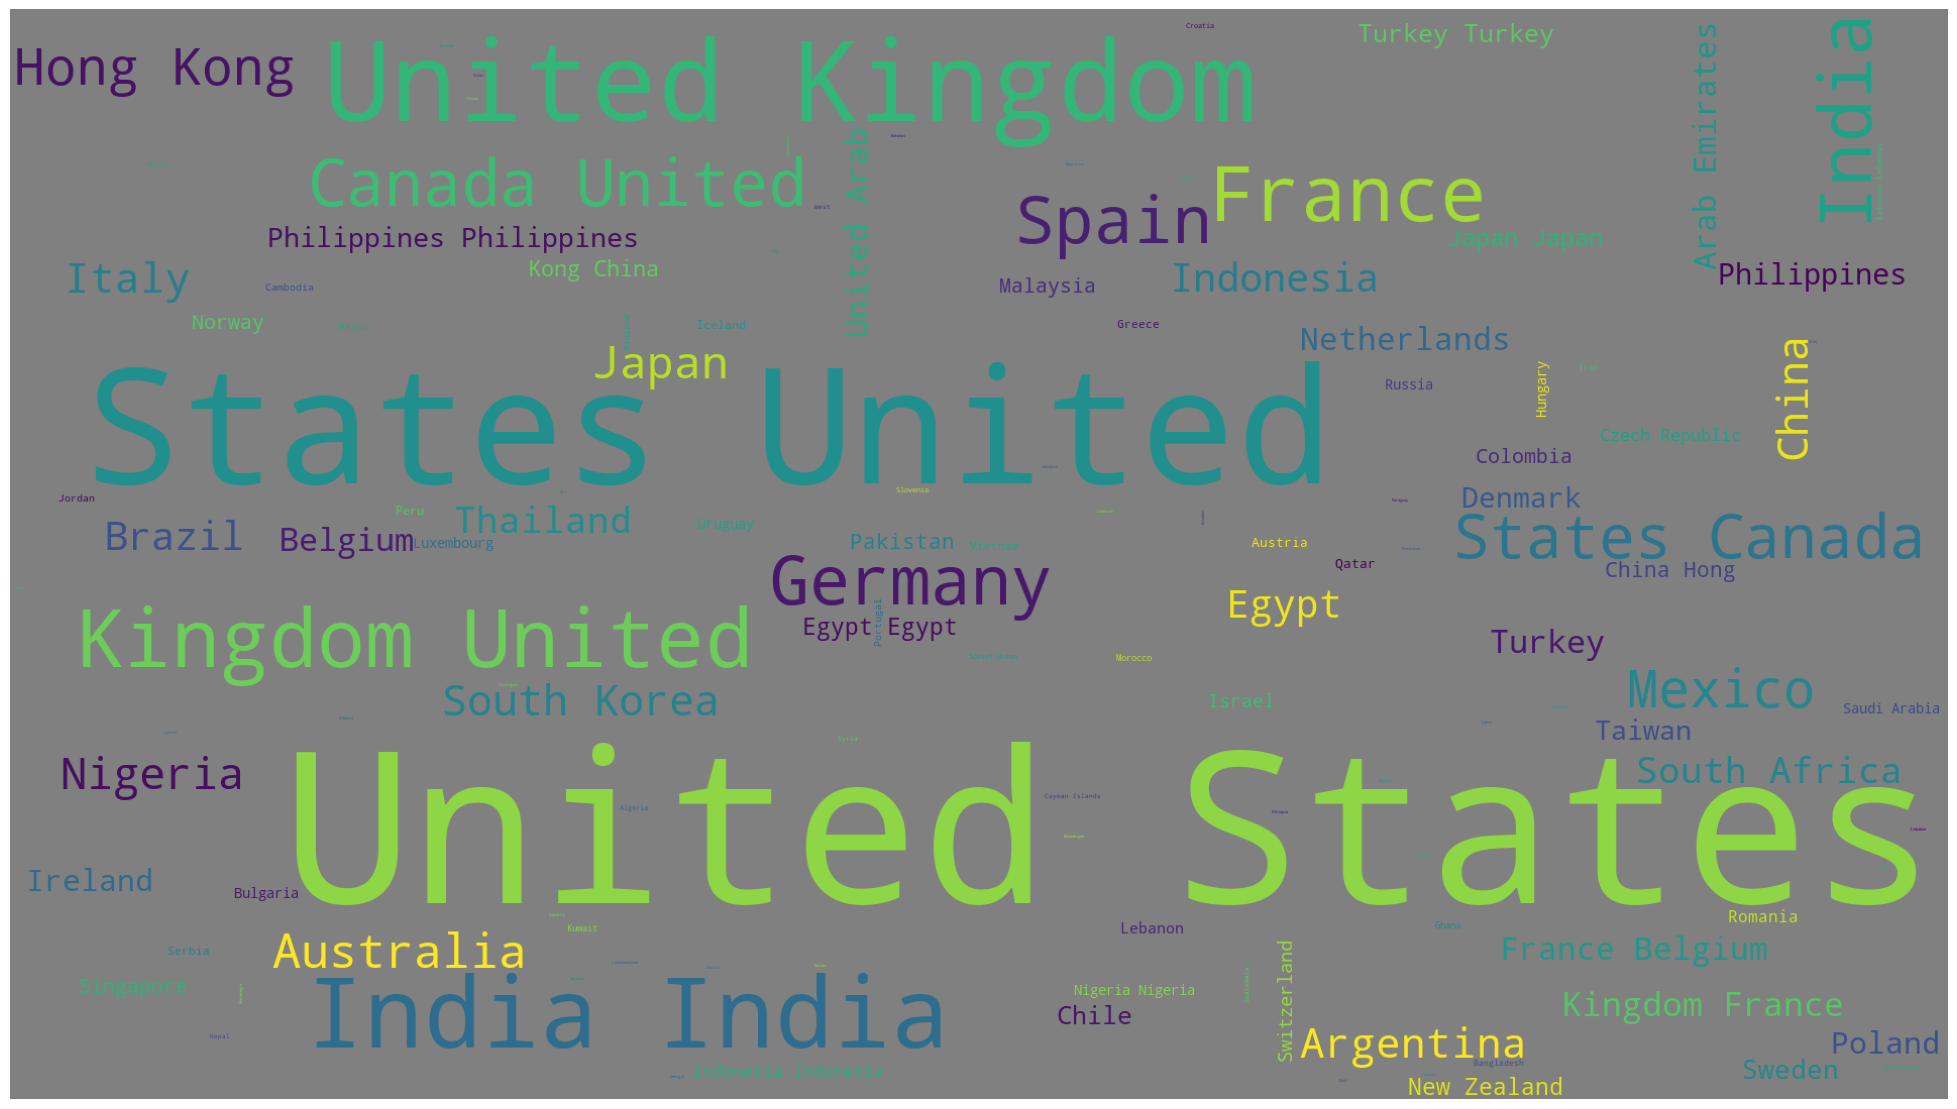

In [70]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Grey',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


# Cast in the Shows

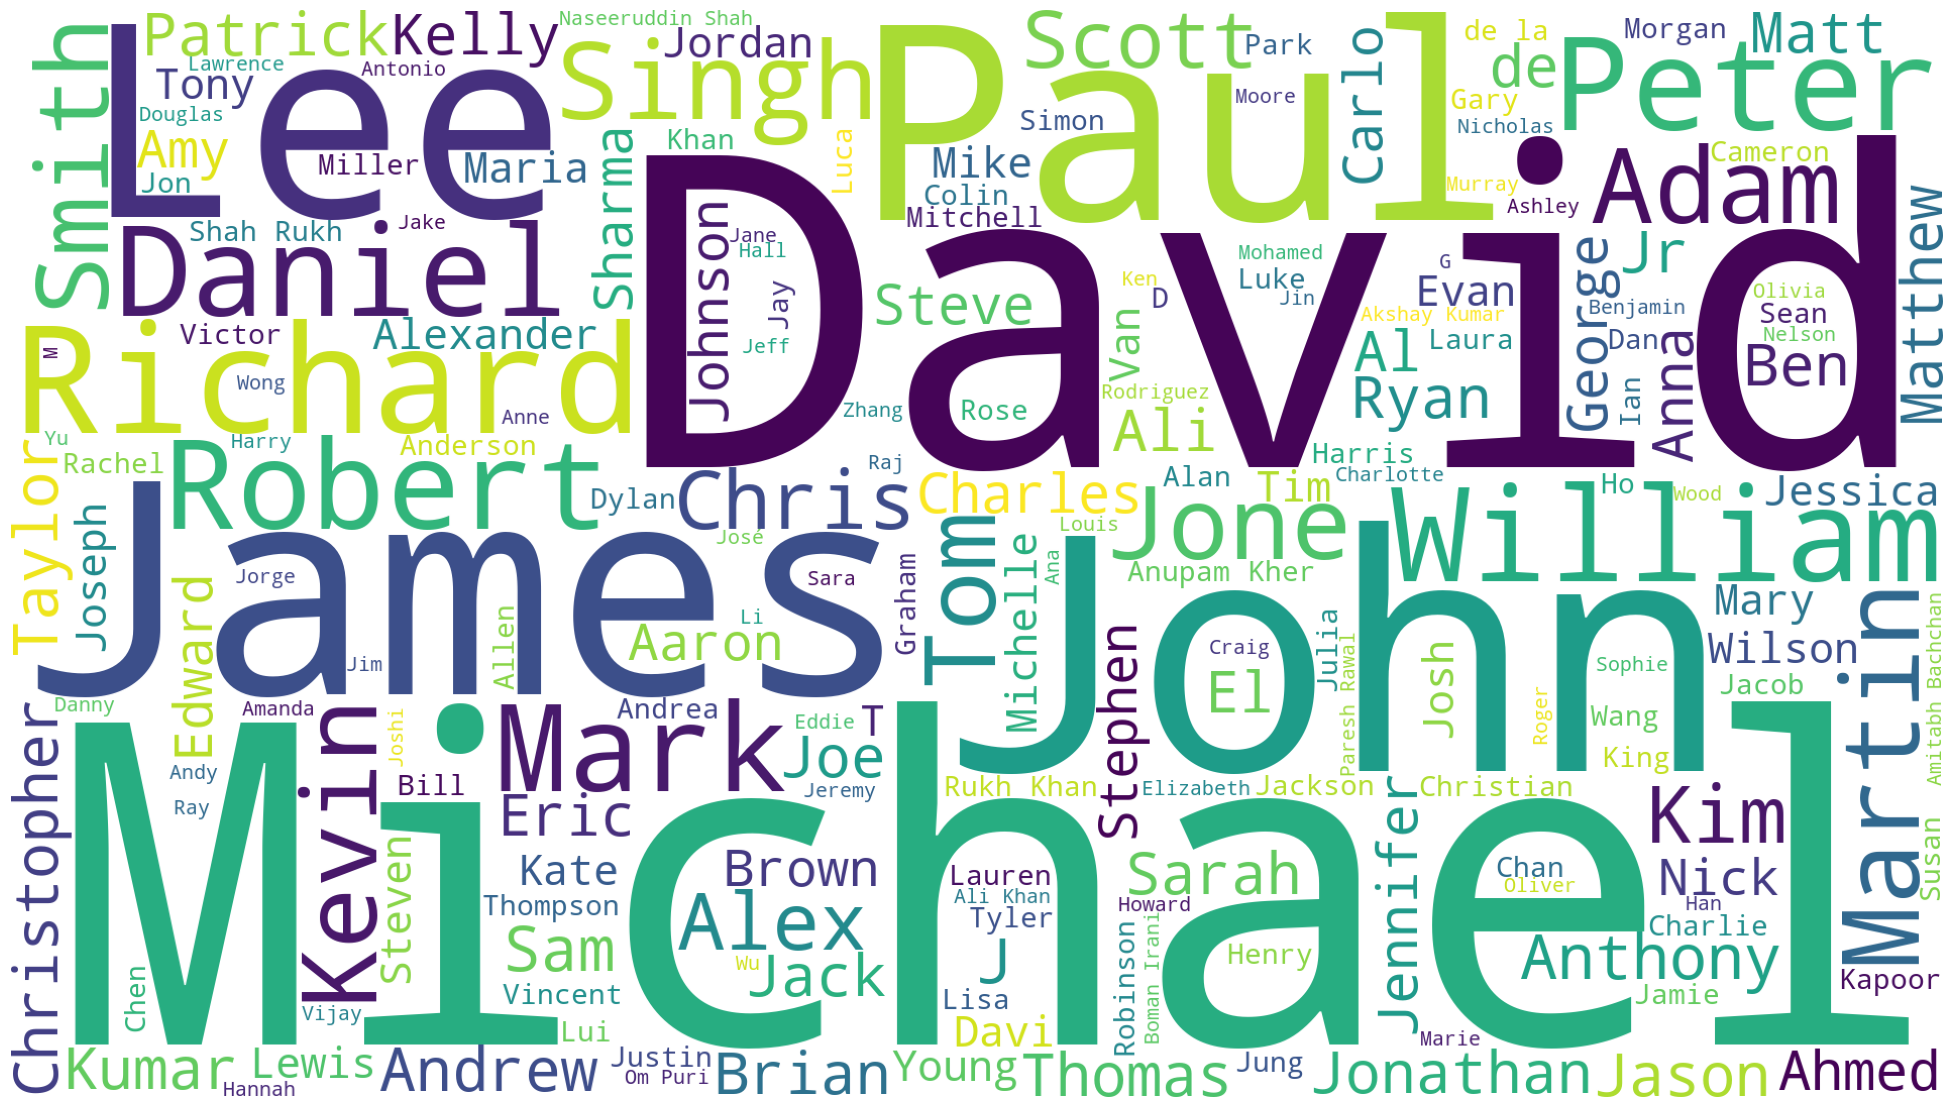

In [72]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# Directors

PermissionError: [Errno 13] Permission denied: 'director.png'

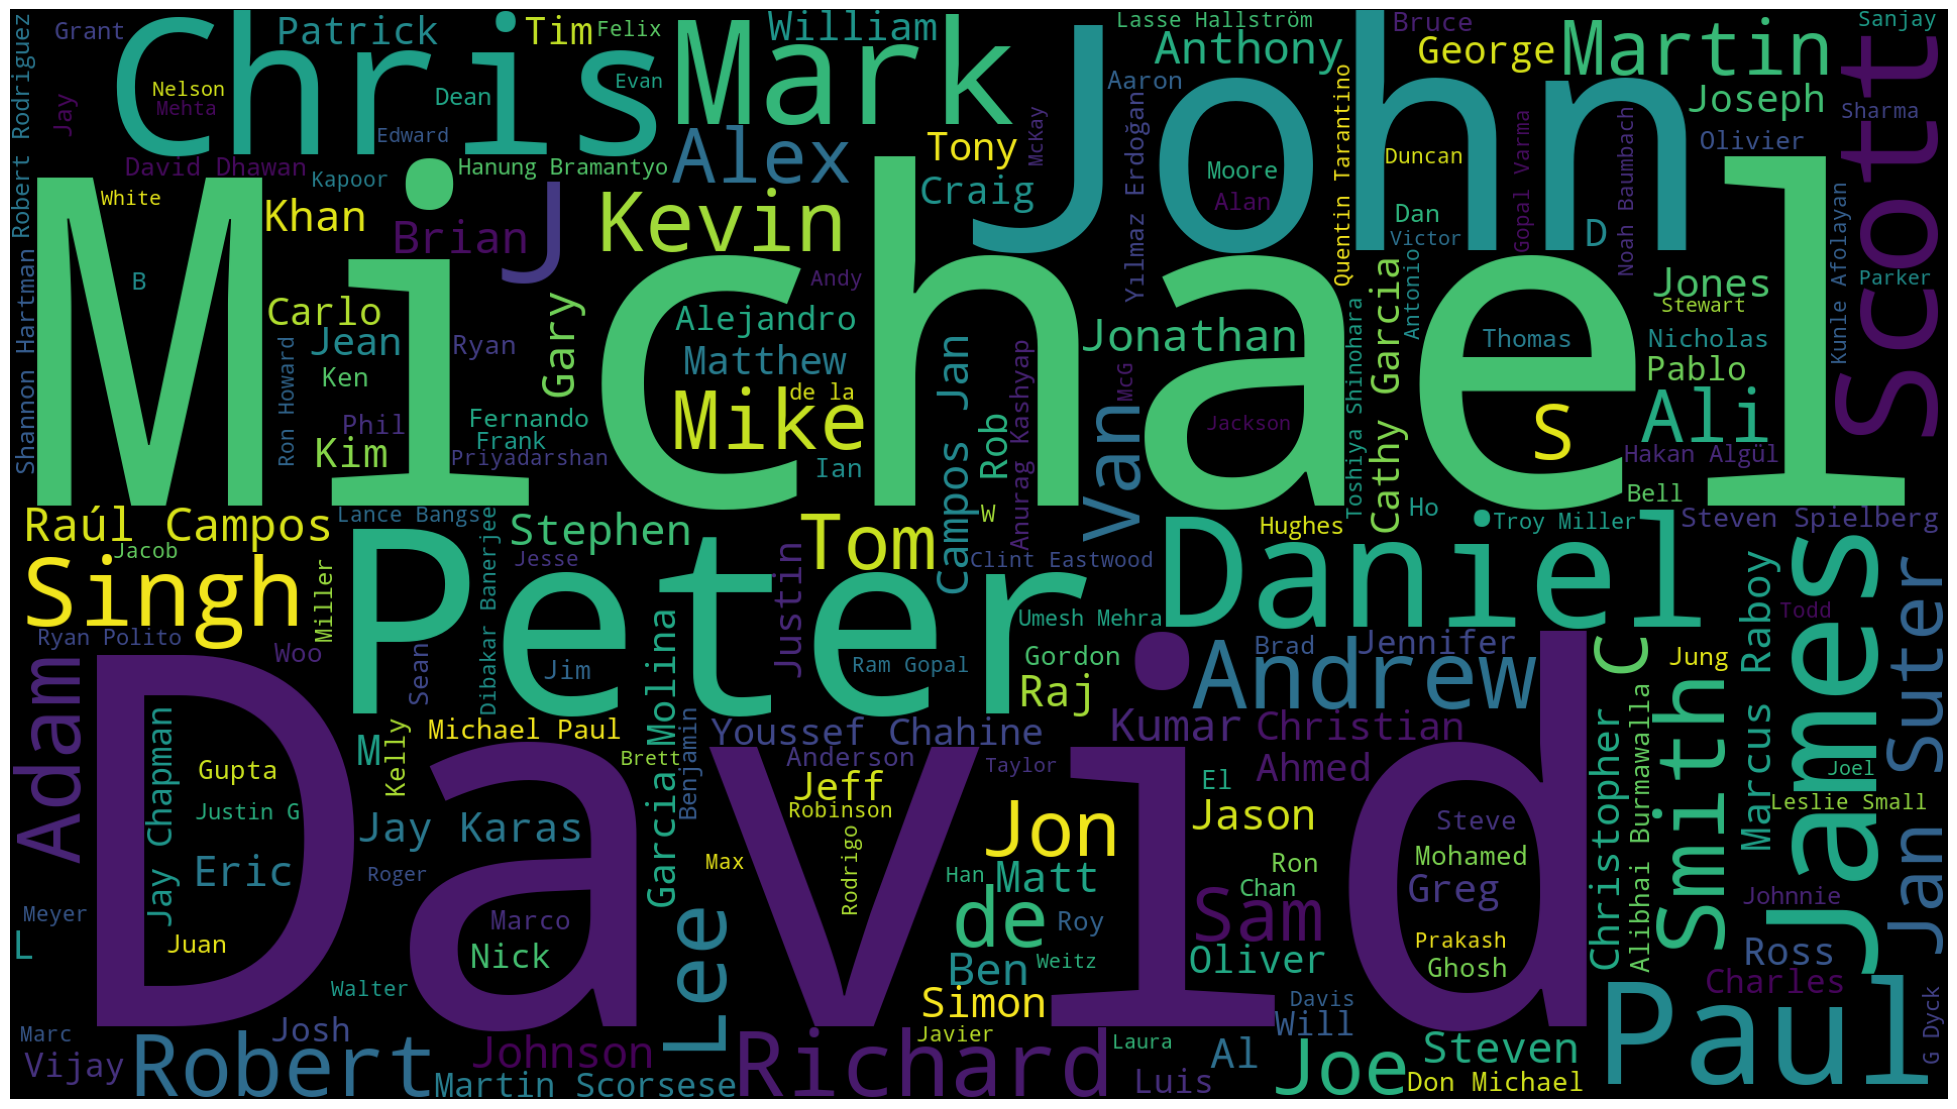

In [81]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

# Categories

PermissionError: [Errno 13] Permission denied: 'category.png'

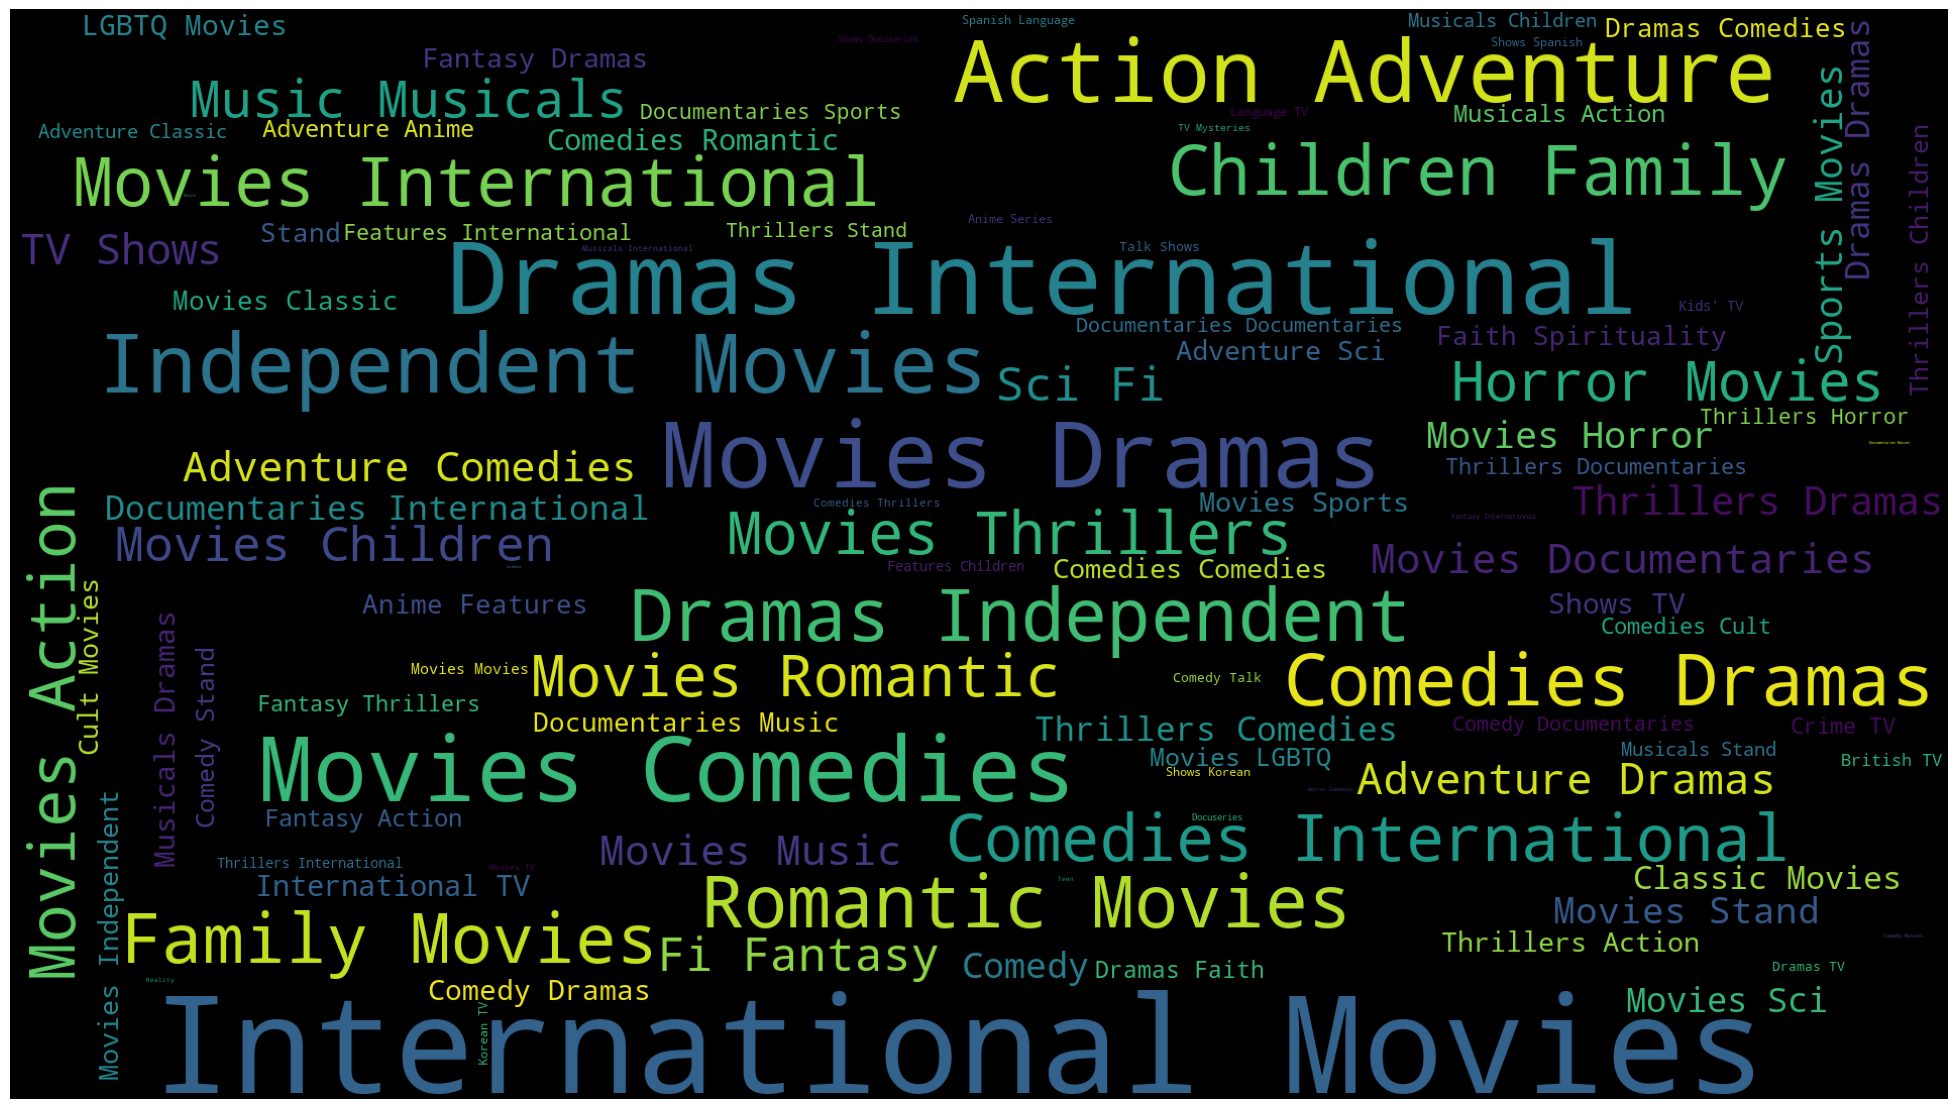

In [84]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()